## [예제]
## 사이킷런의 load_breast_cancer 데이터를 이용하여
## n_neighbors를 1~11까지 변화시켜가며 트레인 정확도와
## 테스트 정확도 그래프를 확인하고 가장 적절한 k값을 판단해 보세요

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import pandas as pd

In [8]:
data = datasets.load_breast_cancer()

In [12]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [22]:
data_df = pd.DataFrame(data.data, columns=data.feature_names)

In [17]:
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
data_df_target = pd.DataFrame(data.target, columns=['target'])

In [21]:
data_df_target.head()

,target
0,0
1,0
2,0
3,0
4,0


In [28]:
data_df_target.count()

target    569
dtype: int64

In [32]:
pd.concat([data_df,data_df_target],axis=1).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [63]:
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [64]:
print(X_train.shape)
print(X_test.shape)

(455, 30)
(114, 30)


In [65]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
predict_label = clf.predict(X_test)

In [66]:
print('test accuracy {:2f}'.format(np.mean(predict_label == y_test)))
print('트레인 세트 정확도: {:.2f}'.format(clf.score(X_train,y_train)))
print('테스트 세트 정확도: {:.2f}'.format(clf.score(X_test,y_test)))

test accuracy 0.912281
트레인 세트 정확도: 0.96
테스트 세트 정확도: 0.91


In [90]:
train_data =[]
test_data =[]
for i in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=i)

    clf.fit(X_train, y_train)

#     print('n_neighbors:{}'.format(i))
#     print('트레인 세트 정확도: {:.2f}'.format(clf.score(X_train,y_train)))
#     print('테스트 세트 정확도: {:.2f}'.format(clf.score(X_test,y_test)))
    train_data.append(clf.score(X_train,y_train))
    test_data.append(clf.score(X_test,y_test))

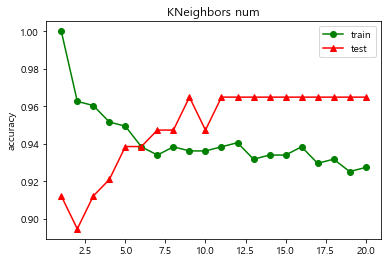

In [91]:
plt.plot(np.arange(1,len(train_data)+1),train_data, color='g',marker='o', label='train')
plt.plot(np.arange(1,len(test_data)+1),test_data, color='r',marker='^' , label='test')
plt.legend()
plt.title('KNeighbors num')
plt.ylabel("accuracy")
plt.show()

In [92]:
import matplotlib.font_manager as fm

In [93]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
font_list[0]

'C:\\Windows\\Fonts\\BOOKOSB.TTF'

In [94]:
font_path = 'C:\\WINDOWS\\Fonts\\malgun.ttf'
font_name = fm.FontProperties(fname = font_path).get_name()
plt.rcParams['font.family'] = font_name

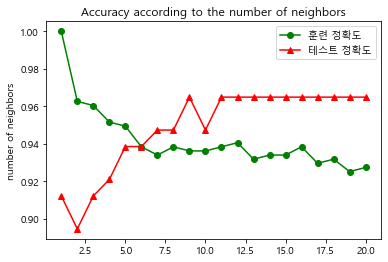

In [95]:
plt.plot(np.arange(1,len(train_data)+1),train_data, color='g',marker='o', label='훈련 정확도')
plt.plot(np.arange(1,len(test_data)+1),test_data, color='r',marker='^' , label='테스트 정확도')
plt.legend()
plt.title('Accuracy according to the number of neighbors')
plt.ylabel("accuracy")
plt.ylabel("number of neighbors")
plt.show()